## Task 1: PCA ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target


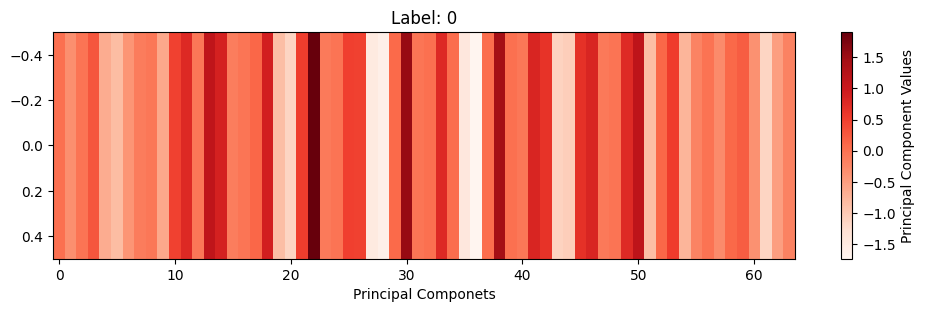

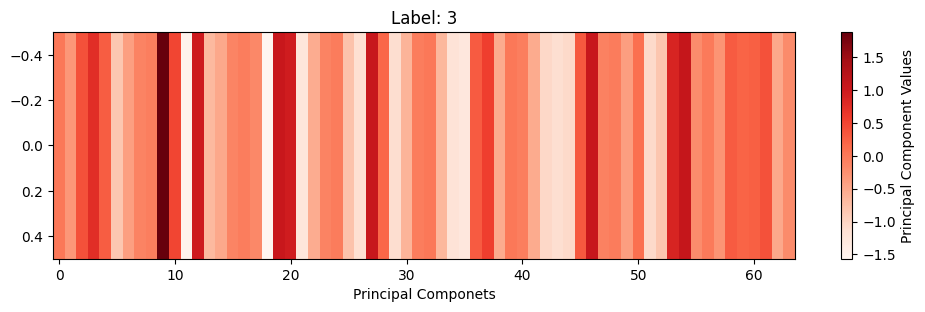

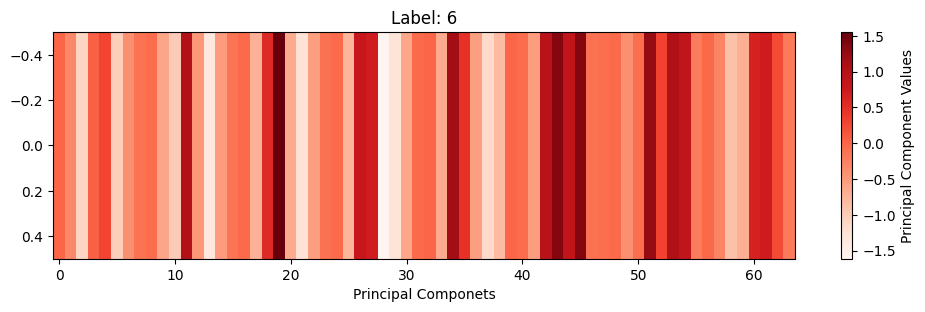

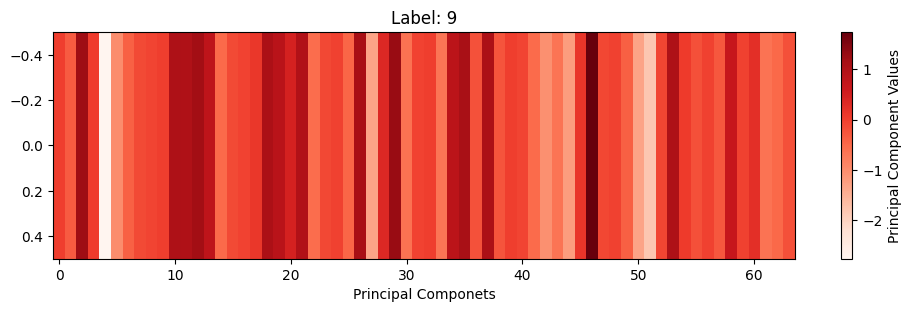

In [8]:
# Step 1: Standardize the dataset using StandardScaler
# and visualize samples [0, 3, 6, 9] using plt.imshow
# Specify the label (i.e., 0, 3, 6, 9) in the title

Scaler = StandardScaler()
scaledX = Scaler.fit_transform(X_digits)

index = [0, 3, 6, 9]

for i in index:
  plt.figure(figsize = (10, 3))
  plt.imshow(scaledX[i].reshape((1,64)), aspect = 'auto', cmap = "Reds")
  plt.xlabel("Principal Componets")
  plt.tight_layout()
  plt.colorbar(label="Principal Component Values")
  plt.title(f"Label: {i}")
  plt.show()

# (5 points)


In [19]:
# Step 2: Create a function named "apply_pca" that takes in the data and n_components as arguments
# the function should return 3 values: the fitted PCA model, result from fitting the model, and explained_variance_ratio_

# (3 points)
def apply_pca(data, n_components):
  model = PCA(n_components = n_components).fit(data) #create unfitted model
  fitted_data = model.fit_transform(data)
  return model, fitted_data, model.explained_variance_ratio_



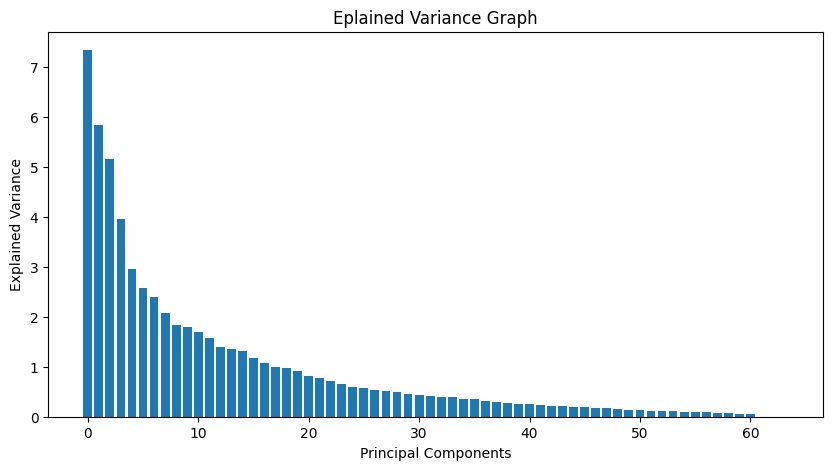

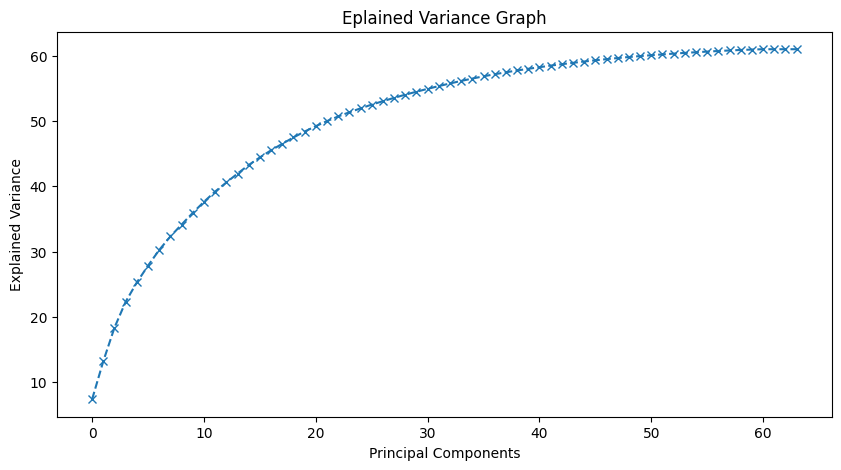

In [20]:
# Step 3: Plot explained variance (bar) and cumulative explained variance (dashed line)
# Add the appropriate xlabel, ylabel, and title

# (8 points)
model = PCA()
transformed = model.fit_transform(scaledX)
EVR = model.explained_variance_

cumunlativeEVR = EVR.cumsum()

#MAKE BAR GRAPH
plt.figure(figsize=(10,5))
plt.bar([i for i in range(0,len(EVR))], EVR)
plt.title("Eplained Variance Graph")
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")
plt.show()

#MAKE LINE GRAPH
plt.figure(figsize=(10,5))
plt.plot([i for i in range(0,len(cumunlativeEVR))], cumunlativeEVR, linestyle="--", marker="x")
plt.title("Eplained Variance Graph")
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")
plt.show()


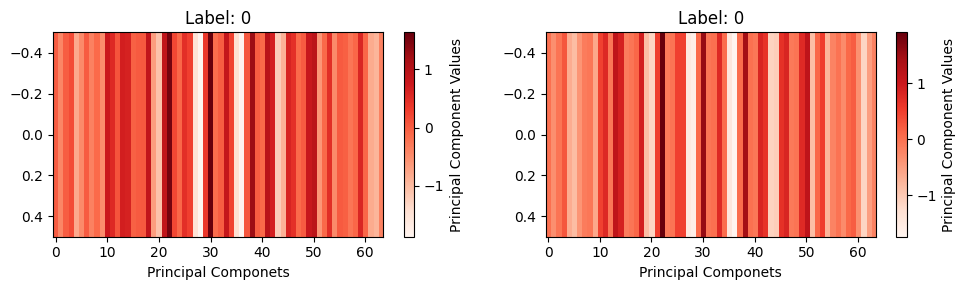

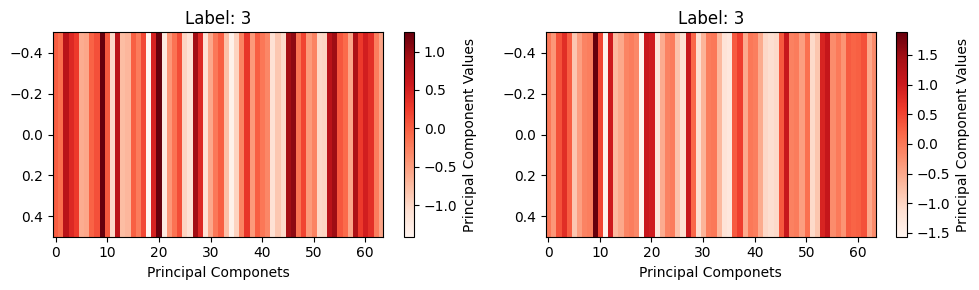

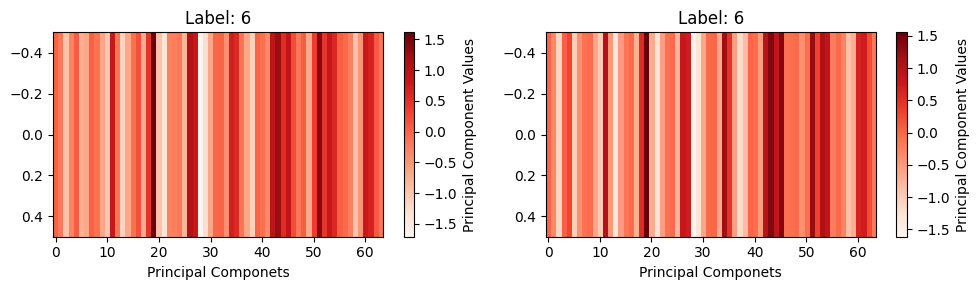

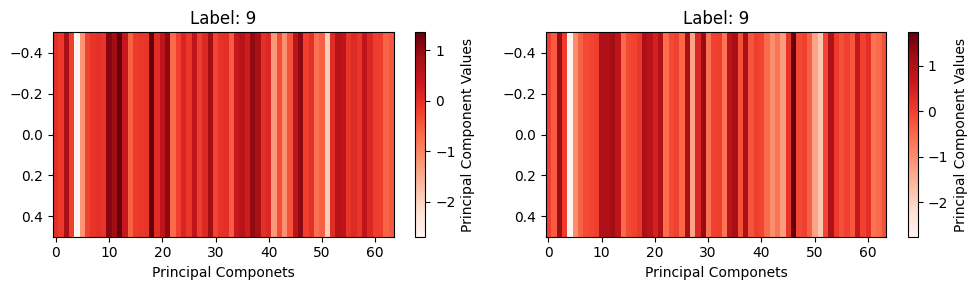

In [24]:
# Step 4: Feature Reconstruction
# Choose a subset of principal components (e.g., first 32 components) (use the apply_pca function with n_components set to your choice)
# Reconstruct the original features using the selected principal components
# HINT: reconstruction is achieved by multiplying the transformed data by the transpose of the principal components and adding back the mean of the original data
# Compare the reconstructed features (i.e., plot side by side using imshow with interpolation='bilinear') with the original features for samples [0, 3, 6, 9]

# (9 points)

n_comp = 32
PCAmodel, PCAdata, EVR = apply_pca(scaledX, n_comp)

reconstructed = np.dot(PCAdata[:, :n_comp], PCAmodel.components_[:n_comp, :])
reconstructed += np.mean(scaledX, axis=0)

index = [0, 3, 6, 9]

for i in index:
  #----Left---------#
  plt.figure(figsize = (10, 3))
  plt.subplot(1, 2, 1)
  plt.imshow(reconstructed[i].reshape((1,64)), aspect = 'auto', cmap = "Reds")
  plt.xlabel("Principal Componets")
  plt.colorbar(label="Principal Component Values")
  plt.title(f"Label: {i}")
  #--------Right----------#
  plt.subplot(1, 2, 2)
  plt.imshow(scaledX[i].reshape((1,64)), aspect = 'auto', cmap = "Reds")
  plt.xlabel("Principal Componets")
  plt.colorbar(label="Principal Component Values")
  plt.title(f"Label: {i}")
  plt.tight_layout()
  plt.show()


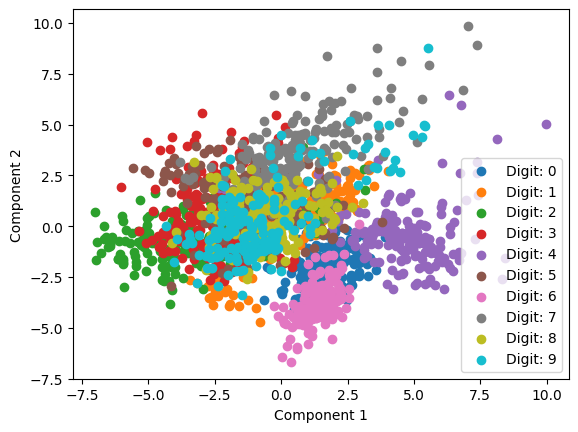

Yes


In [27]:
# Step 5: Visualization of Principal Components
# Visualize the data in the reduced-dimensional space using the top two principal components
# add the appropriate xlabel, ylabel, title and legend

## Does the visualization convey the message that using the first two principal components is able to classify the digits well?
## Print "yes" or "no" to the above question

# (5 points: 4 for plotting and 1 for print)

PCAmodel, PCAdata, EVR = apply_pca(scaledX, 2)

plt.figure()
for i in np.unique(y_digits):
  plt.scatter(PCAdata[y_digits==i, 0], PCAdata[y_digits==i, 1], label=f"Digit: {i}")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

print("Yes")

## Task 2: t-SNE ##

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Data Exploration and Preparation
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Standardize the features
scaler_digits = StandardScaler()
X_digits_std = scaler_digits.fit_transform(X_digits)

In [30]:
# Step 2: Create a function named "apply_tsne" that takes in the data and perplexity as arguments
# This function should fit the TSNE model with the specified perplexity argument and return the results

# (3 points)

def apply_tsne(data, perplexity):
  tsne = TSNE(perplexity=perplexity).fit(data)
  fitted_data = tsne.fit_transform(data)
  return fitted_data


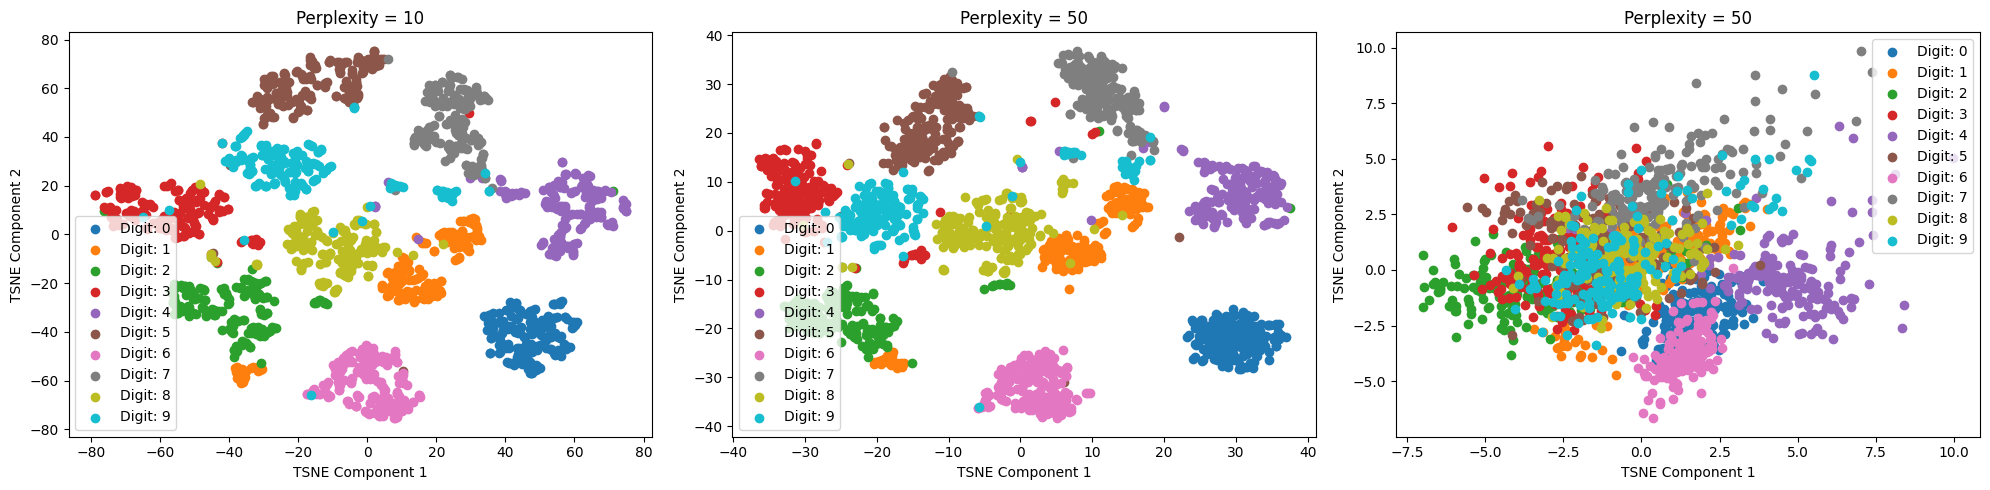

In [33]:
# Step 3: Compare t-SNE against PCA

# Visualize t-SNE transformer features for i.) low perplexity (10)
#                                         ii.) high perplexity (50)
# Fit a PCA model with n_components=10 and visualize the results
# Stack all the 3 visualizations side by side
# Add the appropriate xlabel, ylabel, title. For t-SNE, add the legend as well.

# (9 points)
plt.figure(figsize=(20,5))

#LOW
L_Perp = apply_tsne(X_digits_std, 10)
plt.subplot(1, 3, 1)
for i in np.unique(y_digits):
  plt.scatter(L_Perp[y_digits==i, 0], L_Perp[y_digits==i, 1], label=f"Digit: {i}")
plt.title("Perplexity = 10")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()
#HIGH
H_Perp = apply_tsne(X_digits_std, 50)
plt.subplot(1, 3, 2)
for i in np.unique(y_digits):
  plt.scatter(H_Perp[y_digits==i, 0], H_Perp[y_digits==i, 1], label=f"Digit: {i}")
plt.title("Perplexity = 50")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()

n_comp = PCA(n_components = 10).fit_transform(X_digits_std)
plt.subplot(1, 3, 3)
for i in np.unique(y_digits):
  plt.scatter(n_comp[y_digits==i, 0], n_comp[y_digits==i, 1], label=f"Digit: {i}")
plt.title("Perplexity = 50")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()

plt.tight_layout()
plt.show()



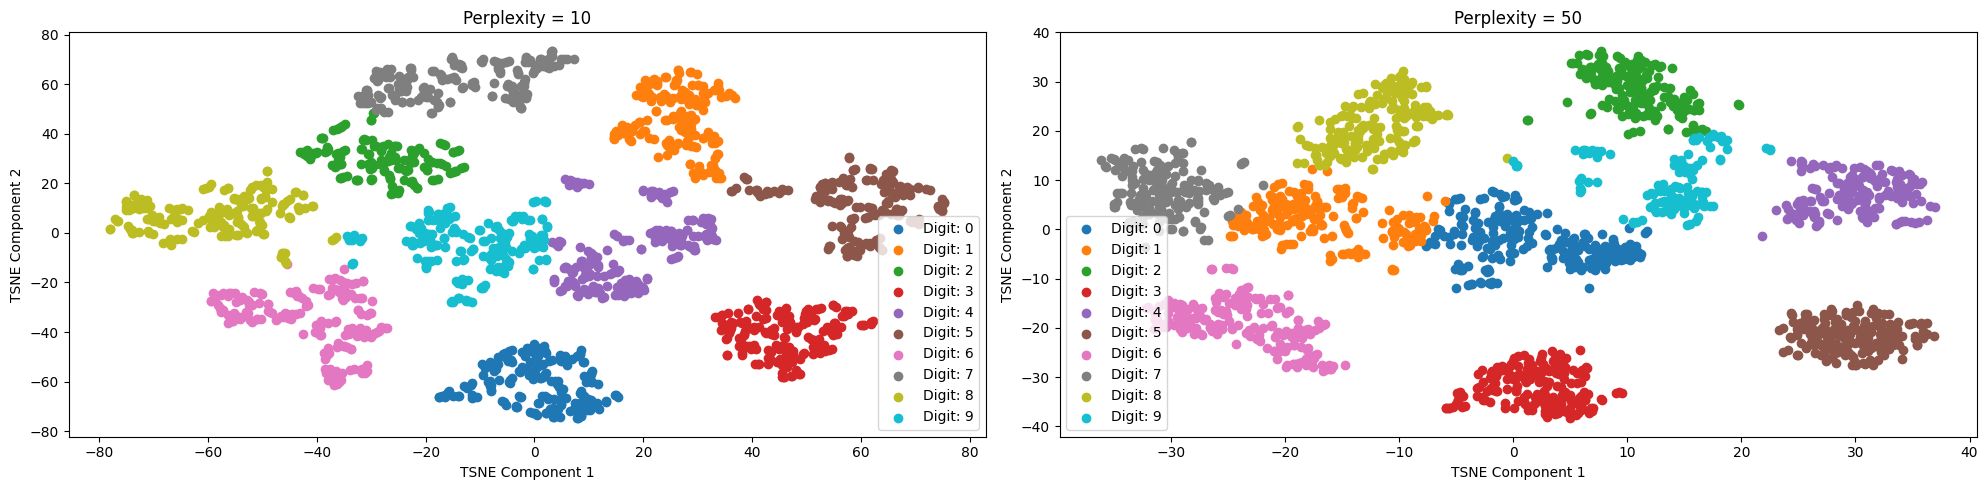

In [35]:
# # Step 4: Clustering Analysis

# Apply K-Means clustering to t-SNE embeddings (both low and high)
# (n_clusters=10, random_state=42)

# (8 points)

plt.figure(figsize=(20,5))

#LOW
L_Perp = apply_tsne(X_digits_std, 10)
K_Low_Perp = KMeans(n_clusters = 10, random_state = 42)
K_Low_Label = K_Low_Perp.fit_predict(L_Perp)
plt.subplot(1, 2, 1)
for i in np.unique(K_Low_Label):
  plt.scatter(L_Perp[K_Low_Label==i, 0], L_Perp[K_Low_Label==i, 1], label=f"Digit: {i}")
plt.title("Perplexity = 10")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()
#HIGH
H_Perp = apply_tsne(X_digits_std, 50)
K_High_Perp = KMeans(n_clusters = 10, random_state = 42)
K_High_Label = K_High_Perp.fit_predict(H_Perp)
plt.subplot(1, 2, 2)
for i in np.unique(K_High_Label):
  plt.scatter(H_Perp[K_High_Label==i, 0], H_Perp[K_High_Label==i, 1], label=f"Digit: {i}")
plt.title("Perplexity = 50")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.legend()

plt.tight_layout()
plt.show()

